In [16]:
import os
import glob
import librosa

folder = r"C:\Users\Administrator\TH4_XLCTG\data"

wav_files = glob.glob(os.path.join(folder, "*.wav"))
for f in wav_files:
    audio, sr = librosa.load(f, sr=None)
    print(f"WAV: {os.path.basename(f)} — {len(audio)/sr:.2f} sec")

WAV: 120bpm_hse_drm_id_001_0093.wav — 8.07 sec
WAV: 120bpm_hse_drm_id_001_0317.wav — 8.07 sec
WAV: 120bpm_hse_drm_id_001_1204.wav — 8.07 sec
WAV: 122bpm_hse_drm_id_001_1588.wav — 7.94 sec
WAV: 122bpm_hse_drm_id_001_1765.wav — 7.94 sec
WAV: 122bpm_hse_drm_id_002_1466.wav — 7.94 sec
WAV: alb_esp1.wav — 95.48 sec
WAV: alb_esp2.wav — 127.58 sec
WAV: alb_esp3.wav — 176.82 sec
WAV: alb_esp4.wav — 194.31 sec
WAV: alb_esp5.wav — 124.64 sec
WAV: appass_1.wav — 561.32 sec
WAV: appass_2.wav — 371.99 sec
WAV: appass_3.wav — 467.00 sec
WAV: beethoven_hammerklavier_1.wav — 594.64 sec
WAV: beethoven_hammerklavier_2.wav — 137.34 sec
WAV: beethoven_hammerklavier_3.wav — 766.29 sec
WAV: test1.wav — 251.01 sec
WAV: test2.wav — 305.12 sec
WAV: test3.wav — 7.86 sec
WAV: test4.wav — 7.89 sec
WAV: test5.wav — 7.68 sec


Phân tích nhóm Nhạc điện tử...
Phân tích nhóm Nhạc cổ điển...


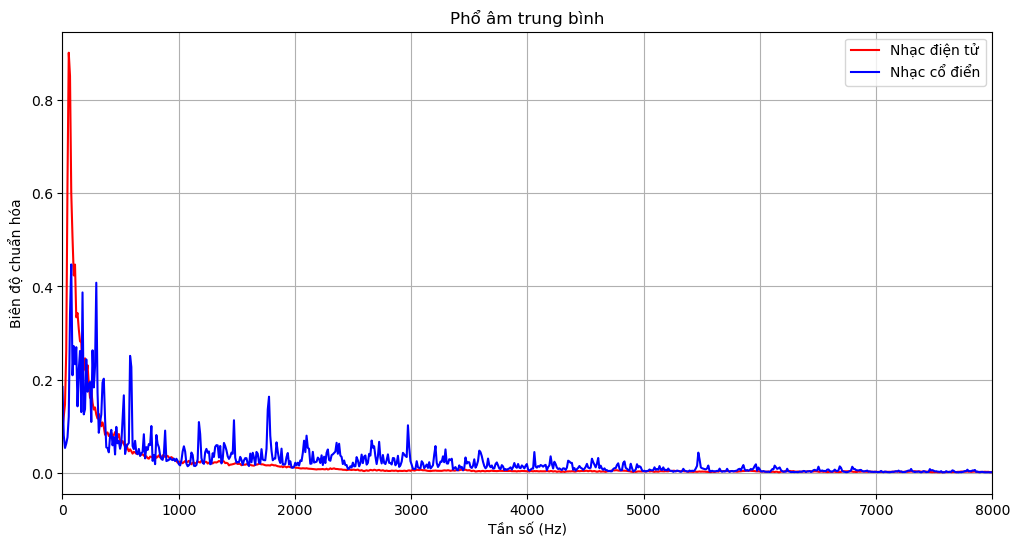

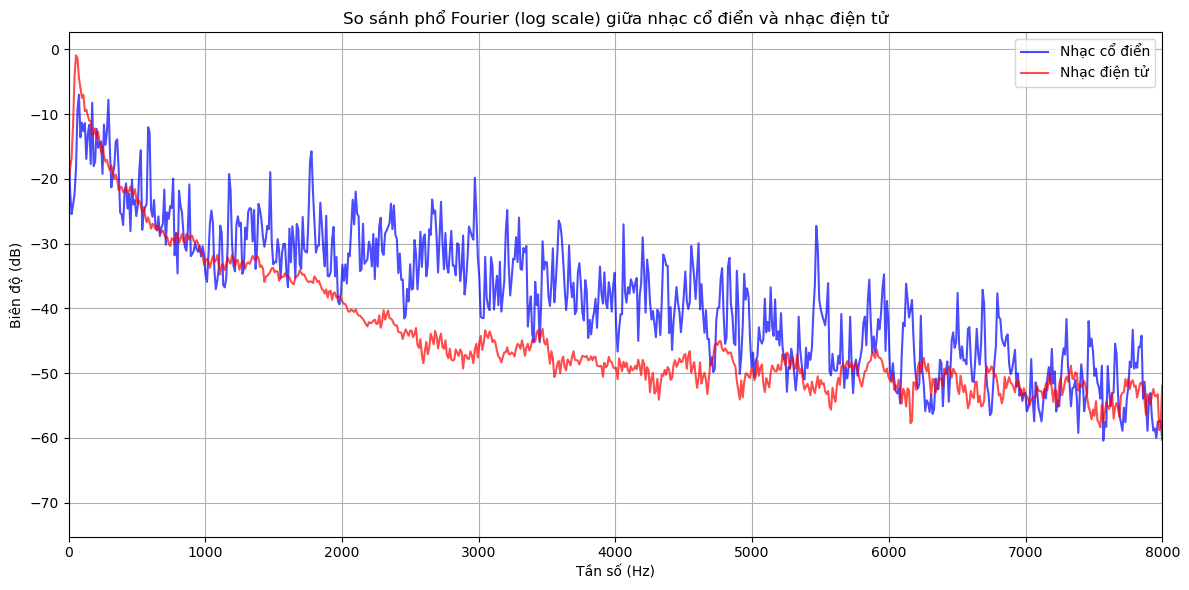

In [24]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d

os.chdir(r"C:\Users\Administrator\TH4_XLCTG\data")

def analyze_audio_file(file_path, n_fft=4096):
    if not os.path.exists(file_path):
        print(f"File {file_path} không tìm thấy, bỏ qua.")
        return None
    
    try:
        y, sr = librosa.load(file_path, sr=None)
    except Exception as e:
        print(f"Lỗi khi đọc file {file_path}: {e}")
        return None
    
    # Nếu độ dài y nhỏ hơn n_fft, zero padding
    if len(y) < n_fft:
        y = np.pad(y, (0, n_fft - len(y)), mode='constant')
    else:
        y = y[:n_fft]  # cắt nếu dài hơn
    
    Y = np.fft.rfft(y, n=n_fft)
    freq = np.fft.rfftfreq(n_fft, d=1/sr)
    magnitude = np.abs(Y)
    magnitude_norm = magnitude / np.max(magnitude)
    
    # Tính năng lượng theo dải tần trên freq
    energy_low = np.sum(magnitude[(freq >= 20) & (freq < 250)]**2)
    energy_mid = np.sum(magnitude[(freq >= 250) & (freq < 2000)]**2)
    energy_high = np.sum(magnitude[(freq >= 2000) & (freq < 8000)]**2)
    
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft)[0].mean()
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft)[0].mean()
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=n_fft)[0].mean()
    
    return {
        'file': file_path,
        'freq': freq,
        'fft_norm': magnitude_norm,
        'energy_low': energy_low,
        'energy_mid': energy_mid,
        'energy_high': energy_high,
        'centroid': centroid,
        'bandwidth': bandwidth,
        'rolloff': rolloff
    }


def plot_avg_spectrum(results, label, color):
    if len(results) == 0:
        print(f"Không có dữ liệu phổ để vẽ cho {label}")
        return
    n_fft = len(results[0]['fft_norm'])
    # Xếp phổ theo dạng (số file, n_fft)
    all_fft = np.array([r['fft_norm'] for r in results])
    avg_fft = np.mean(all_fft, axis=0)
    freq = results[0]['freq']
    plt.plot(freq, avg_fft, label=label, color=color)
    plt.xlim(0, 8000)
    plt.xlabel('Tần số (Hz)')
    plt.ylabel('Biên độ chuẩn hóa')
    plt.title('Phổ âm trung bình')
    plt.grid(True)

# Danh sách file tương tự như trước
electronic_files = [
    '120bpm_hse_drm_id_001_0093.wav',
    '120bpm_hse_drm_id_001_0317.wav',
    '120bpm_hse_drm_id_001_1204.wav',
    '122bpm_hse_drm_id_001_1588.wav',
    '122bpm_hse_drm_id_001_1765.wav',
    '122bpm_hse_drm_id_002_1466.wav'
]

classical_files = [
    'alb_esp1.wav',
    'alb_esp2.wav',
    'appass_1.wav', 
    'appass_2.wav',  
    'beethoven_hammerklavier_1.wav', 
    'beethoven_hammerklavier_2.wav', 
]

def analyze_group(files):
    results = []
    for f in files:
        r = analyze_audio_file(f)
        if r is not None:
            results.append(r)
    return results

print("Phân tích nhóm Nhạc điện tử...")
electronic_results = analyze_group(electronic_files)
print("Phân tích nhóm Nhạc cổ điển...")
classical_results = analyze_group(classical_files)

plt.figure(figsize=(12,6))
plot_avg_spectrum(electronic_results, 'Nhạc điện tử', 'r')
plot_avg_spectrum(classical_results, 'Nhạc cổ điển', 'b')
plt.legend()
plt.show()
# Tính phổ trung bình (log-scale) cho từng nhóm
def get_avg_log_fft(results):
    all_fft = np.array([r['fft_norm'] for r in results])
    avg_fft = np.mean(all_fft, axis=0)
    freq = results[0]['freq']
    log_fft = 20 * np.log10(avg_fft + 1e-6)  # chuyển sang dB
    return freq, log_fft

xf_classical, yf_classical = get_avg_log_fft(classical_results)
xf_electronic, yf_electronic = get_avg_log_fft(electronic_results)

plt.figure(figsize=(12, 6))
plt.plot(xf_classical, yf_classical, label='Nhạc cổ điển', color='blue', alpha=0.7)
plt.plot(xf_electronic, yf_electronic, label='Nhạc điện tử', color='red', alpha=0.7)
plt.title('So sánh phổ Fourier (log scale) giữa nhạc cổ điển và nhạc điện tử')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ (dB)')
plt.xlim(0, 8000)     # Giới hạn dải tần
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

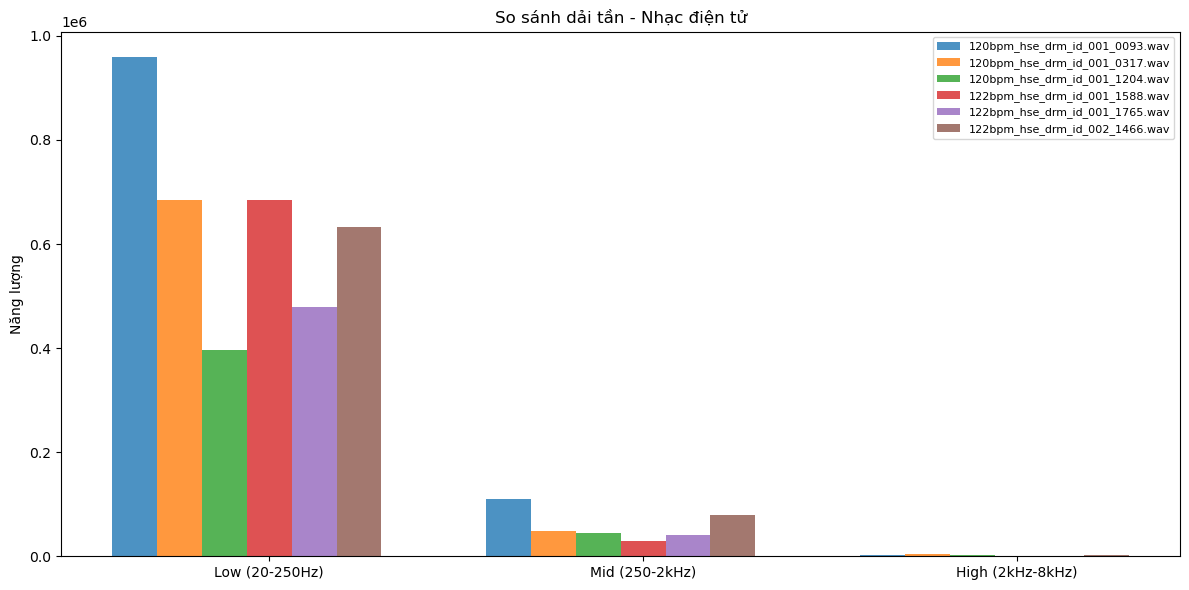

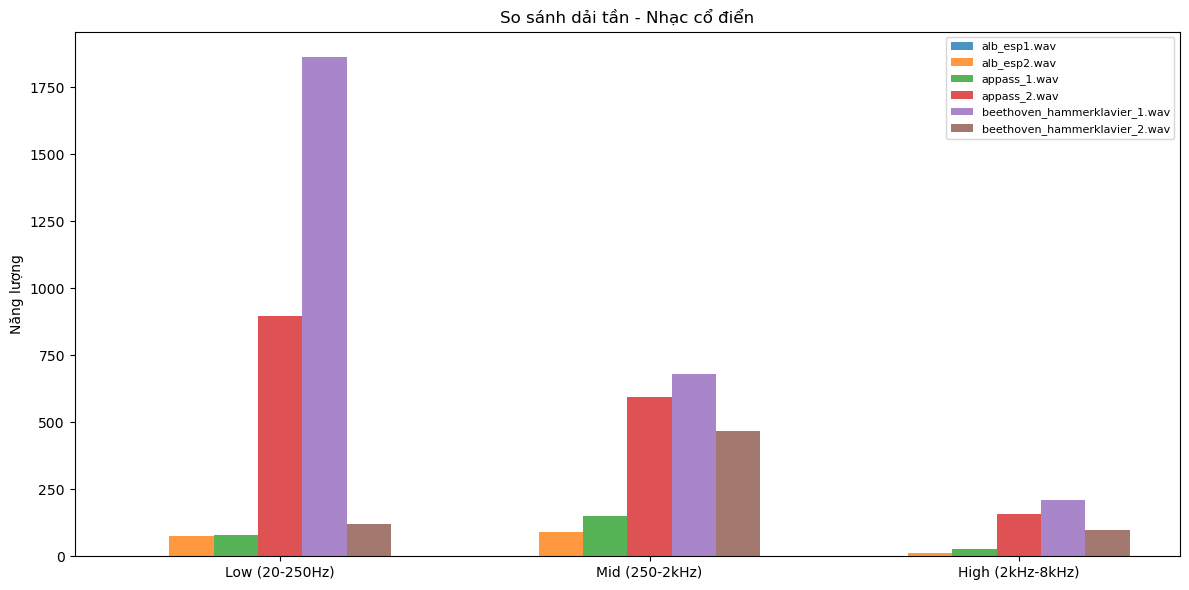

In [25]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

def extract_features(file_path, n_fft=4096):
    try:
        y, sr = librosa.load(file_path, sr=None)
    except Exception as e:
        print(f"Lỗi đọc file {file_path}: {e}")
        return None

    if len(y) < n_fft:
        y = np.pad(y, (0, n_fft - len(y)), mode='constant')
    else:
        y = y[:n_fft]
    
    Y = np.fft.rfft(y, n=n_fft)
    freq = np.fft.rfftfreq(n_fft, 1/sr)
    mag = np.abs(Y)
    
    energy_low = np.sum(mag[(freq >= 20) & (freq < 250)]**2)
    energy_mid = np.sum(mag[(freq >= 250) & (freq < 2000)]**2)
    energy_high = np.sum(mag[(freq >= 2000) & (freq < 8000)]**2)
    
    return {
        'energy_low': energy_low,
        'energy_mid': energy_mid,
        'energy_high': energy_high,
    }

# === Danh sách file âm thanh ===
dir_path = r"C:\Users\Administrator\TH4_XLCTG\data"

electronic_files = [
    '120bpm_hse_drm_id_001_0093.wav',
    '120bpm_hse_drm_id_001_0317.wav',
    '120bpm_hse_drm_id_001_1204.wav',
    '122bpm_hse_drm_id_001_1588.wav',
    '122bpm_hse_drm_id_001_1765.wav',
    '122bpm_hse_drm_id_002_1466.wav'
]
classical_files = [
    'alb_esp1.wav',
    'alb_esp2.wav',
    'appass_1.wav', 
    'appass_2.wav',  
    'beethoven_hammerklavier_1.wav', 
    'beethoven_hammerklavier_2.wav', 
]

electronic_paths = [os.path.join(dir_path, f) for f in electronic_files]
classical_paths = [os.path.join(dir_path, f) for f in classical_files]

def analyze_group(file_paths):
    result = []
    for f in file_paths:
        feats = extract_features(f)
        if feats is not None:
            result.append((os.path.basename(f), feats))
    return result

electronic_feats = analyze_group(electronic_paths)
classical_feats = analyze_group(classical_paths)

def plot_energy_comparison(data, title, color):
    labels = ['Low (20-250Hz)', 'Mid (250-2kHz)', 'High (2kHz-8kHz)']
    x = np.arange(len(labels))
    width = 0.12

    fig, ax = plt.subplots(figsize=(12, 6))

    for idx, (name, feat) in enumerate(data):
        energies = [feat['energy_low'], feat['energy_mid'], feat['energy_high']]
        ax.bar(x + idx * width - width * len(data)/2, energies, width, label=name, alpha=0.8)

    ax.set_ylabel('Năng lượng')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(fontsize=8)
    plt.tight_layout()
    plt.show()

# === Vẽ biểu đồ riêng cho từng thể loại ===
plot_energy_comparison(electronic_feats, 'So sánh dải tần - Nhạc điện tử', 'red')
plot_energy_comparison(classical_feats, 'So sánh dải tần - Nhạc cổ điển', 'blue')


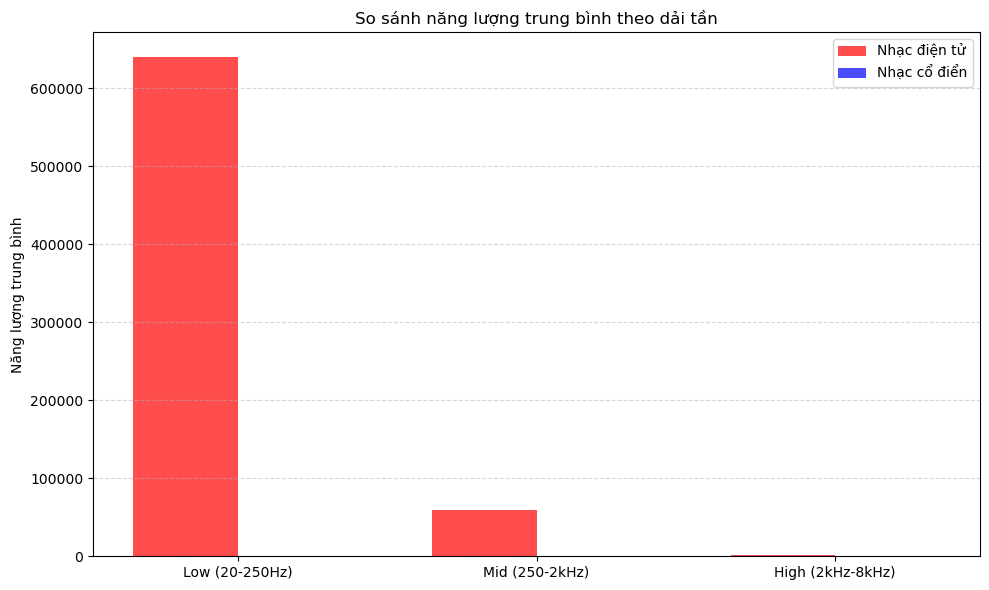

In [26]:
# === Tính năng lượng trung bình theo từng dải tần ===
def compute_avg_energy(data):
    low = np.mean([d[1]['energy_low'] for d in data])
    mid = np.mean([d[1]['energy_mid'] for d in data])
    high = np.mean([d[1]['energy_high'] for d in data])
    return [low, mid, high]

electronic_avg = compute_avg_energy(electronic_feats)
classical_avg = compute_avg_energy(classical_feats)

# === Vẽ biểu đồ so sánh năng lượng trung bình ===
labels = ['Low (20-250Hz)', 'Mid (250-2kHz)', 'High (2kHz-8kHz)']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, electronic_avg, width, label='Nhạc điện tử', color='red', alpha=0.7)
ax.bar(x + width/2, classical_avg, width, label='Nhạc cổ điển', color='blue', alpha=0.7)

ax.set_ylabel('Năng lượng trung bình')
ax.set_title('So sánh năng lượng trung bình theo dải tần')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def extract_features_for_classification(results):
    
    features = []
    for r in results:
        fvec = [
            r['energy_low'],
            r['energy_mid'],
            r['energy_high'],
            r['centroid'],
            r['bandwidth'],
            r['rolloff']
        ]
        features.append(fvec)
    return np.array(features)

# 1. Trích đặc trưng
X_classical = extract_features_for_classification(classical_results)
X_electronic = extract_features_for_classification(electronic_results)

# 2. Gán nhãn (0 = cổ điển, 1 = điện tử)
y_classical = np.zeros(len(X_classical))
y_electronic = np.ones(len(X_electronic))

# 3. Ghép dữ liệu
X = np.vstack((X_classical, X_electronic))
y = np.concatenate((y_classical, y_electronic))

# 4. Chia dữ liệu train/test (ví dụ 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 5. Khởi tạo mô hình RandomForest và huấn luyện
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 6. Dự đoán trên tập test
y_pred = clf.predict(X_test)

# 7. Đánh giá accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Độ chính xác mô hình phân loại thể loại: {acc*100:.2f}%")

# 8. In ra một số dự đoán để kiểm tra
for i in range(len(y_test)):
    print(f"Thể loại thực: {'Cổ điển' if y_test[i]==0 else 'Điện tử'}, Dự đoán: {'Cổ điển' if y_pred[i]==0 else 'Điện tử'}")


Độ chính xác mô hình phân loại thể loại: 100.00%
Thể loại thực: Điện tử, Dự đoán: Điện tử
Thể loại thực: Điện tử, Dự đoán: Điện tử
Thể loại thực: Cổ điển, Dự đoán: Cổ điển
Thể loại thực: Cổ điển, Dự đoán: Cổ điển


In [28]:
import os
import librosa
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# 1. Trích xuất MFCC cho mỗi file (chuỗi đặc trưng)
def extract_mfcc_sequence(file_path, n_mfcc=13, max_len=130):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc = mfcc.T  # shape: (time, n_mfcc)
    
    if len(mfcc) > max_len:
        mfcc = mfcc[:max_len]
    else:
        mfcc = np.pad(mfcc, ((0, max_len - len(mfcc)), (0, 0)), mode='constant')
    
    return mfcc  # shape: (max_len, n_mfcc)


In [29]:
class AudioGenreDataset(Dataset):
    def __init__(self, file_paths, labels):
        self.data = []
        for path, label in zip(file_paths, labels):
            mfcc_seq = extract_mfcc_sequence(path)
            self.data.append((mfcc_seq, label))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x, y = self.data[idx]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.long)


In [30]:
import torch.nn as nn

class GenreLSTM(nn.Module):
    def __init__(self, input_size=13, hidden_size=64, num_layers=1, num_classes=2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        out = self.classifier(hn[-1])  # dùng hidden state cuối cùng
        return out


In [31]:
import matplotlib.pyplot as plt

def train_model(model, train_loader, num_epochs=20, lr=1e-3):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    model.train()
    
    losses = []  # lưu loss mỗi epoch
    
    for epoch in range(num_epochs):
        total_loss = 0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            preds = model(x_batch)
            loss = criterion(preds, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")
    
    # Vẽ biểu đồ loss theo epoch
    plt.figure(figsize=(8,5))
    plt.plot(range(1, num_epochs+1), losses, marker='o')
    plt.title('Loss theo Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

Epoch 1/20, Loss: 0.7090
Epoch 2/20, Loss: 0.6667
Epoch 3/20, Loss: 0.6301
Epoch 4/20, Loss: 0.5790
Epoch 5/20, Loss: 0.5410
Epoch 6/20, Loss: 0.5126
Epoch 7/20, Loss: 0.4831
Epoch 8/20, Loss: 0.4606
Epoch 9/20, Loss: 0.4370
Epoch 10/20, Loss: 0.4170
Epoch 11/20, Loss: 0.3970
Epoch 12/20, Loss: 0.3778
Epoch 13/20, Loss: 0.3632
Epoch 14/20, Loss: 0.3397
Epoch 15/20, Loss: 0.3188
Epoch 16/20, Loss: 0.3012
Epoch 17/20, Loss: 0.2865
Epoch 18/20, Loss: 0.2734
Epoch 19/20, Loss: 0.2612
Epoch 20/20, Loss: 0.2482


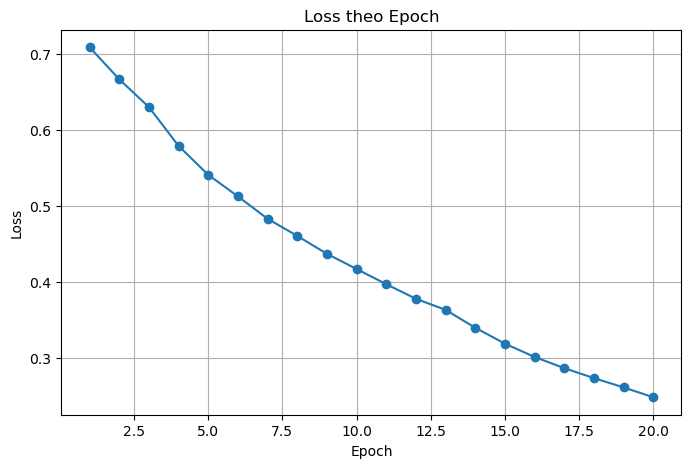

In [32]:
dir_path = r"C:\Users\Administrator\TH4_XLCTG\data"
electronic_files = [
    '120bpm_hse_drm_id_001_0093.wav',
    '120bpm_hse_drm_id_001_0317.wav',
    '120bpm_hse_drm_id_001_1204.wav',
    '122bpm_hse_drm_id_001_1588.wav',
    '122bpm_hse_drm_id_001_1765.wav',
    '122bpm_hse_drm_id_002_1466.wav'
]
classical_files = [
    'alb_esp1.wav',
    'alb_esp2.wav',
    'appass_1.wav', 
    'appass_2.wav',  
    'beethoven_hammerklavier_1.wav', 
    'beethoven_hammerklavier_2.wav', 
]

# Đường dẫn đầy đủ và gán nhãn
file_paths = [os.path.join(dir_path, f) for f in electronic_files + classical_files]
labels = [0]*4 + [1]*4  # 0: điện tử, 1: cổ điển

# Dataset và DataLoader
dataset = AudioGenreDataset(file_paths, labels)
train_loader = DataLoader(dataset, batch_size=2, shuffle=True)

# Khởi tạo và huấn luyện
model = GenreLSTM()
train_model(model, train_loader)

In [33]:
def predict(model, file_path):
    model.eval()
    x = extract_mfcc_sequence(file_path)
    x = torch.tensor(x, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        logits = model(x)
        pred = torch.argmax(logits, dim=1).item()
    return 'Điện tử' if pred == 0 else 'Cổ điển'

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, data_loader, device='cpu'):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\nAccuracy: {acc * 100:.2f}%\n")

    # Classification Report
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=["Nhạc điện tử", "Nhạc cổ điển"]))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Điện tử", "Cổ điển"], yticklabels=["Điện tử", "Cổ điển"])
    plt.xlabel("Dự đoán")
    plt.ylabel("Thực tế")
    plt.title("Ma trận nhầm lẫn")
    plt.show()


In [36]:
# Danh sách các file test
test_files = [
    r"C:\Users\Administrator\TH4_XLCTG\data\test1.wav",
    r"C:\Users\Administrator\TH4_XLCTG\data\test2.wav",
    r"C:\Users\Administrator\TH4_XLCTG\data\test5.wav"
]

# Dự đoán từng file
for file_path in test_files:
    genre = predict(model, file_path)
    print(f"File: {os.path.basename(file_path)} => Thể loại dự đoán: {genre}")
    print("-" * 60)


File: test1.wav => Thể loại dự đoán: Cổ điển
------------------------------------------------------------
File: test2.wav => Thể loại dự đoán: Cổ điển
------------------------------------------------------------
File: test5.wav => Thể loại dự đoán: Điện tử
------------------------------------------------------------
